In [118]:
# Importing Libraries.

import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from PIL import ImageGrab

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# ***Question 1***

> # *A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured. Analyze the data and draw inferences at 5% significance level.*




> Solution: We are going to conduct a 2 tailed t-test on two independent samples with numerical data.

# ***Step 1***

Make two Null Hypothesis one contradicting to other.
Null Hypothesis is we want to prove.



>  1. Null Hypothesis: $M1=M2$
>  2. Alternate Hypothesis: $M1\neq M2$

# ***Step 2***

# Decide a cut-off value.

> 1. Significance = 5%

> 2. $\alpha=0.05$

> 3. As it is two-tailed test.
$\alpha/2 = 0.25$

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Cutlets.csv to Cutlets.csv


In [3]:
cutlets=pd.read_csv("Cutlets.csv")

In [4]:
cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [5]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [7]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [8]:
cutlets.sample()

,Unit A,Unit B
18,7.2828,7.307


In [10]:
cutlets[cutlets.duplicated()] # No Duplicate Values

,Unit A,Unit B


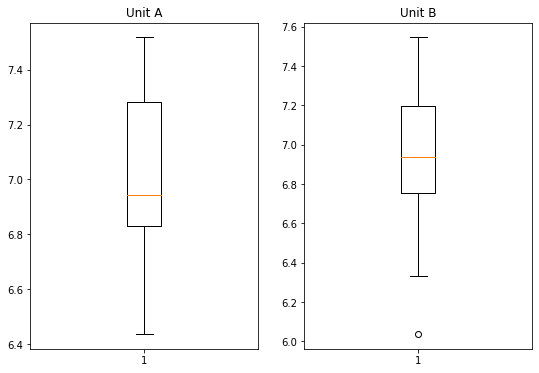

In [13]:
plt.subplots(figsize=(9,6))

plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')

plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')

plt.show()

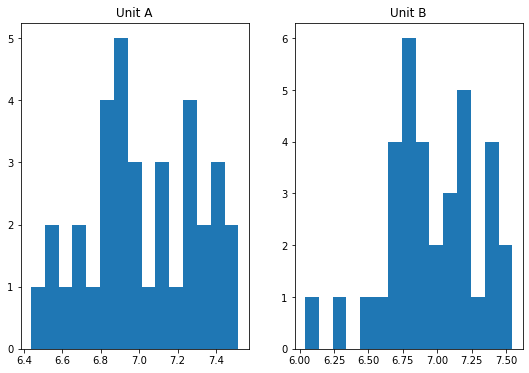

In [14]:
# Histogram

plt.subplots(figsize=(9,6))

plt.subplot(121)
plt.hist(cutlets['Unit A'],bins=15)
plt.title('Unit A')

plt.subplot(122)
plt.hist(cutlets['Unit B'],bins=15)
plt.title('Unit B')

plt.show()

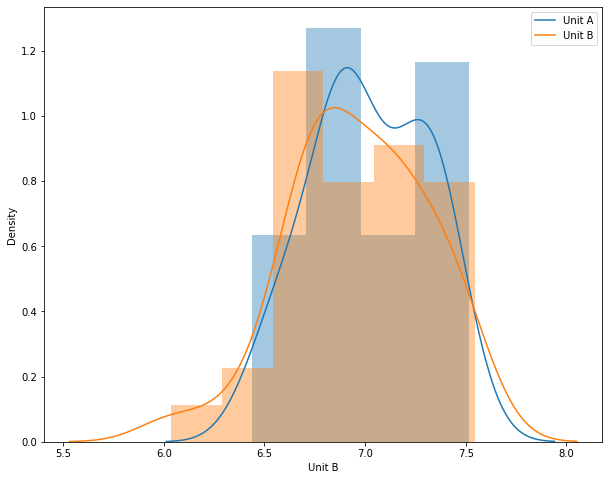

In [15]:
plt.figure(figsize=(10,8))
labels=['Unit A','Unit B']
sns.distplot(cutlets['Unit A'],kde=True)
sns.distplot(cutlets['Unit B'],kde=True)
plt.legend(labels);

In [16]:
# t-test

statistic,p_value=stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'])
print("p_value",p_value)

p_value 0.4722394724599501


Comparep p-value with $\alpha$. (Significance Level)

If p-value $\neq \alpha$ we fail to reject Null Hypothesis because of Lack Of Evidence.

If p-value $=\alpha$ we reject Null Hypothesis.

# **Interpreting p-value**

In [18]:
alpha=0.025

print("Significance=%0.3f, p=%0.3f" %(alpha,p_value) )

if p_value<=alpha:
  print("We reject Null Hypothesis, there is a significance difference between the two Units A and B")
else:
  print("We fail to reject to Null Hypothesis")

Significance=0.025, p=0.472
We fail to reject to Null Hypothesis


> **We fail to reject Null Hypothesis**

> **There is no significant difference between two samples**

# ***Question 2***

> # *A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 Laboratories. TAT is defined as sample collected to report dispatch.*

> # *Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.*

> **Answer:** Here, we are going to conduct **Anova test** because more than two samples are there. 

We need to check whether the mean of any of these samples are different or same?

# ***Step 1***

1. Make two Hypothesis one contradicting to other.

2. Null Hypothesis is what we want to prove.

3. Null Hypothesis: $M1=M2=M3=M4$

4. Alternative Hypothesis: Atleast One of them is different.

# ***Step 2***

1. Decide a cut-off value

2. Significance 5%

3. $\alpha=0.05$

# ***Step 3***

1. Collect Evidence 

2. Importing files.

# ***Step 4***

* Comparing evidences with Hypothesis using t-statistic.

In [19]:
from google.colab import files
uploaded=files.upload()

Saving LabTAT.csv to LabTAT.csv


In [20]:
labtat=pd.read_csv("LabTAT.csv")

In [22]:
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [23]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [25]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [27]:
labtat[labtat.duplicated()] # There are no null values.

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [28]:
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


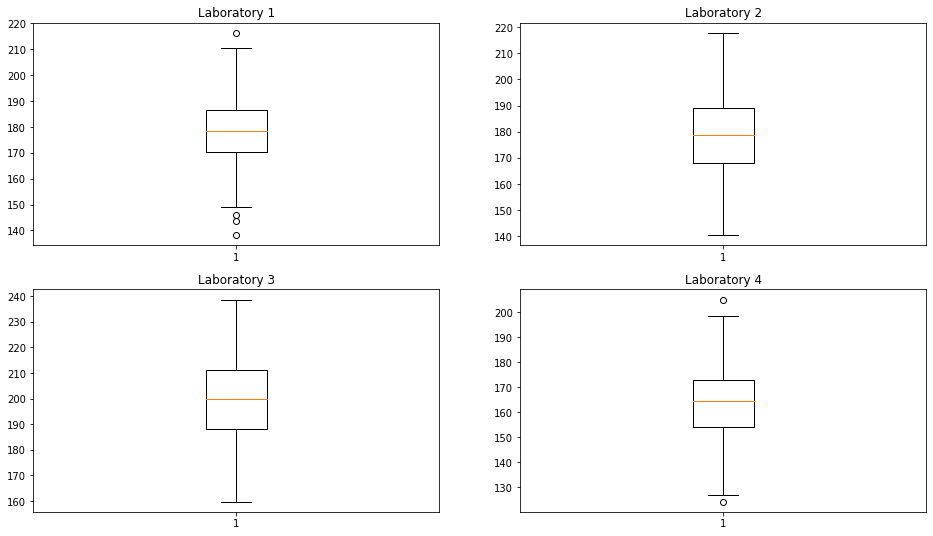

In [30]:
plt.subplots(figsize=(16,9))

plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')

plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')

plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')

plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')

plt.show()

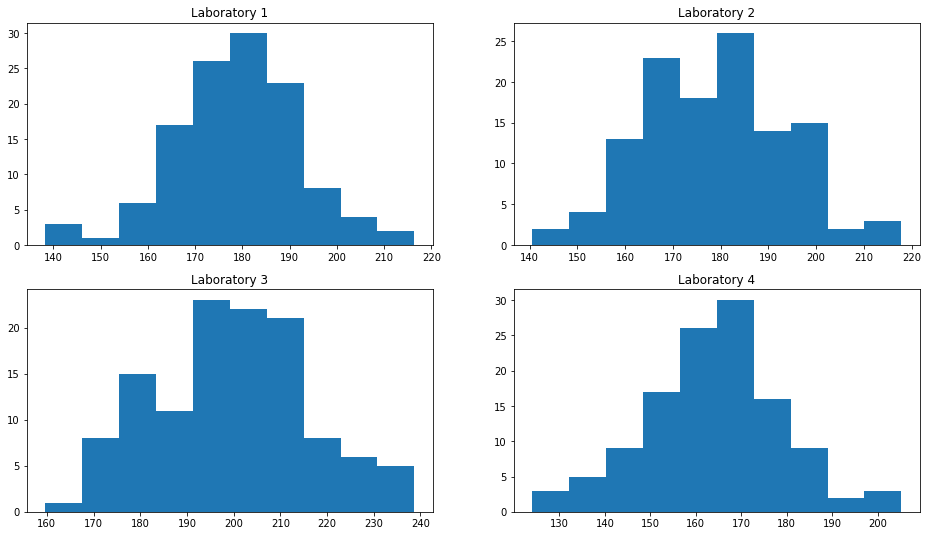

In [33]:
# Histogram

plt.subplots(figsize=(16,9))

plt.subplot(221)
plt.hist(labtat['Laboratory 1'])
plt.title('Laboratory 1')

plt.subplot(222)
plt.hist(labtat['Laboratory 2'])
plt.title('Laboratory 2')

plt.subplot(223)
plt.hist(labtat['Laboratory 3'])
plt.title('Laboratory 3')

plt.subplot(224)
plt.hist(labtat['Laboratory 4'])
plt.title('Laboratory 4')

plt.show()

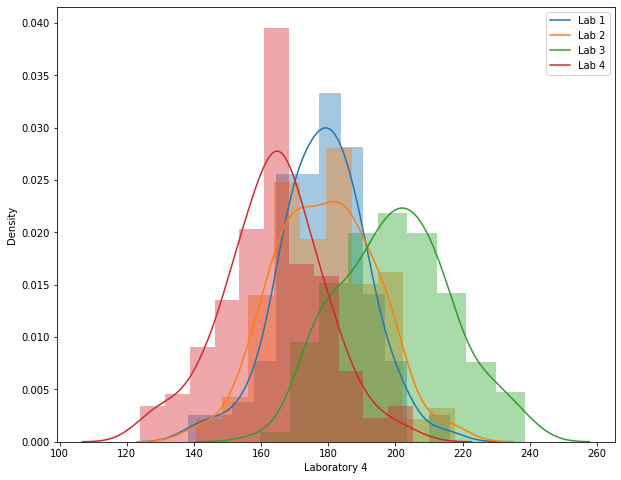

In [35]:
plt.figure(figsize=(10,8))
labels=['Lab 1','Lab 2','Lab 3','Lab 4']
sns.distplot(labtat['Laboratory 1'],kde=True)
sns.distplot(labtat['Laboratory 2'],kde=True)
sns.distplot(labtat['Laboratory 3'],kde=True)
sns.distplot(labtat['Laboratory 4'],kde=True)

plt.legend(labels);

**Step 4**

Compare evidences with Hypothesis using t-statistic.

In [38]:
test_statistic,p_value=stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
print("p-value= ",p_value)

p-value=  2.1156708949992414e-57


1. Compare p-value with $\alpha$ (Significance Level).

2. If p-value $\leq \alpha$, we failed to reject Null Hypothesis beacause of lack of evidence.

3. If p-value $ > \alpha$, we reject Null Hypothesis.

# **Interpreting p-value**

In [39]:
alpha=0.05
print("Significance=%0.3f,p-value=%0.3f"% (alpha,p_value))

if p_value <=alpha:
  print("We reject Null Hypothesis as there is a significance difference between TAT reoprts of the laboratories")
else:
  print("We fail to reject Null Hypothesis")

Significance=0.050,p-value=0.000
We reject Null Hypothesis as there is a significance difference between TAT reoprts of the laboratories


**Hence, we reject Null Hypothesis. There is a difference between TAT of reports.**

# ***Question 3***

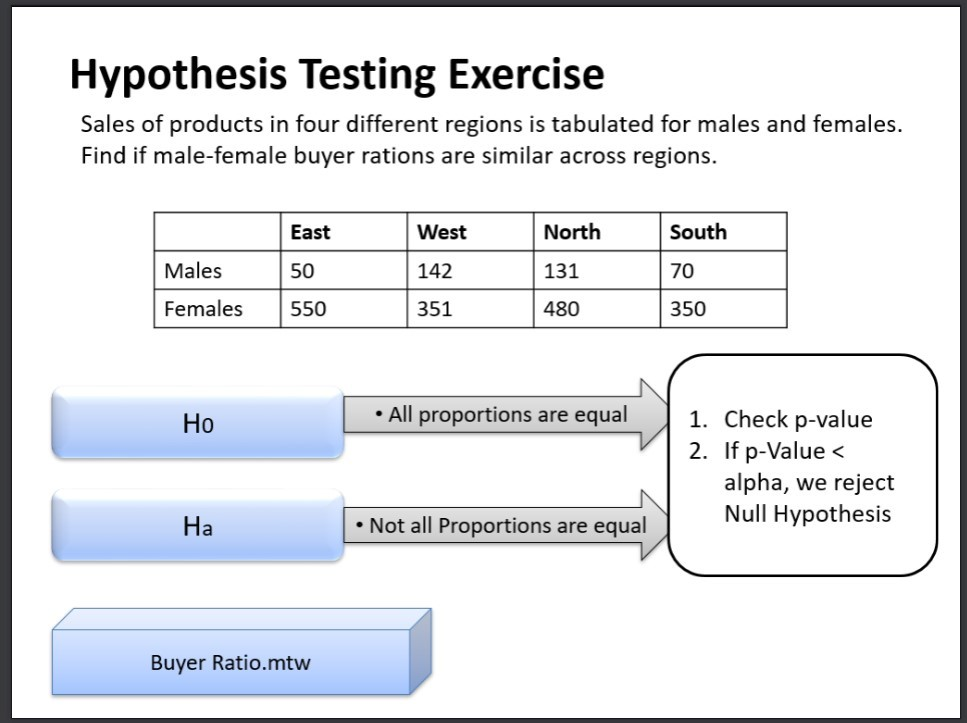

> **Answer:** We are going to conduct a Test of Independence using $χ^2$ test with contingency table.

> We need to check whether the proportion of any of these samples are different or the same.

> In $χ^2$ test we work on categorical data. 

# ***Step 1***

Make two Hypothesis one contradicting to other.

Null Hypothesis is what we want to prove.

Null Hypothesis $H_0$: There is no association or dependency between the gender based buyer rations across regions.

Alternative Hypothesis $H_A$: There is significance association or dependency between the gender based buyer rations across regions.

# ***Step 2***

1. Decide a cut-off value.

2. Significance = 5%.

3. $\alpha=0.05$

As it is a one-tailed test
  $\alpha=1-0.95=0.05$

# ***Step 3***

Collect evidence.

In [47]:
from google.colab import files
uploaded=files.upload()

Saving BuyerRatio.csv to BuyerRatio.csv


In [48]:
buyer=pd.read_csv("BuyerRatio.csv")

In [49]:
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [50]:
buyer.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [51]:
buyer.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [53]:
buyer.isnull().sum()

Observed Values    0
East               0
West               0
North              0
South              0
dtype: int64

In [54]:
East=buyer['East'].mean()
West=buyer['West'].mean()
North=buyer['North'].mean()
South=buyer['South'].mean()

In [57]:
print("East mean= {}\nWest mean={}\nNorth mean={}\nSouth mean={}".format(East,West,North,South))

East mean= 242.5
West mean=832.5
North mean=743.5
South mean=410.0


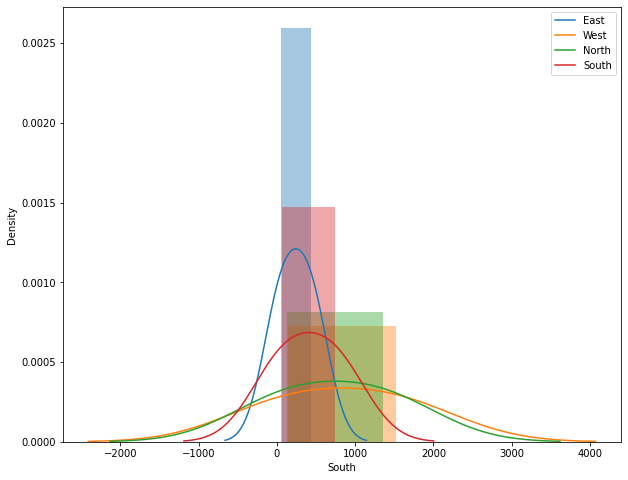

In [61]:
plt.figure(figsize=(10,8))
sns.distplot(buyer['East'])
sns.distplot(buyer['West'])
sns.distplot(buyer['North'])
sns.distplot(buyer['South'])
plt.legend(['East','West','North','South']);

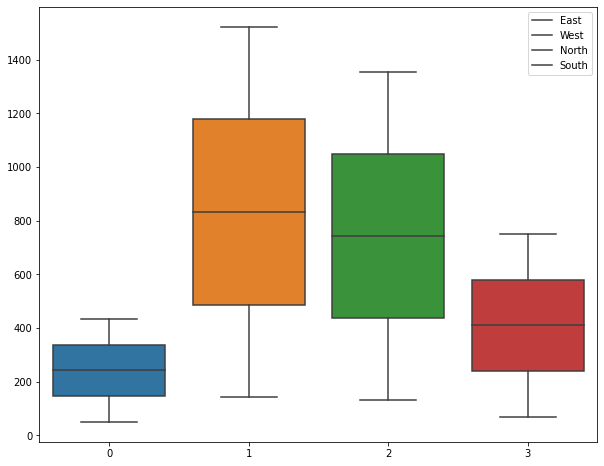

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(data=[buyer['East'],buyer['West'],buyer['North'],buyer['South']])
plt.legend(['East','West','North','South']);

In [65]:
alpha=0.05
Male=[50,142,131,70]
Female=[435,1523,1356,750]
Sales=[Male,Female]
print(Sales)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [66]:
# Importing chi2_contingency

from scipy.stats import chi2_contingency

In [67]:
chi2,p,dof,expected=chi2_contingency(Sales)

In [68]:
chi2

1.595945538661058

In [74]:
print("p-value:{}\nDegrees of Freedom:{}\nExpected Frequencies:\n{}".format(p,dof,expected))

p-value:0.6603094907091882
Degrees of Freedom:3
Expected Frequencies:
[[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [75]:
chi2_contingency(Sales)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [89]:
# Interpreting by p-values
alpha=0.05

print('\u03B1','=',alpha)
print("p value is:",np.round(p,4))
if p<=alpha:
  print("We reject Null Hypothesis i.e., Not all Proportions are equal.")
else:
  print("We accept Null Hypothesis i.e., All proportions are equal.")

α = 0.05
p value is: 0.6603
We accept Null Hypothesis i.e., All proportions are equal.


**Conclusion: We accept Null Hypothesis i.e., All Proportions are equal.**

# ***Question 4***

> # *TeleCall uses 4 centers around the globe to process customer order forms.They audit a certain % of the customer order forms.Any error in order form renders it defective and has to be reworked before processing.The manager wants to check whether the defective % varies by centre.Please analyaze the data at 5% significance level and help the manager draw at 5% significance level and help the manager draw appropriate inference.* 

> **Answer:** We are going to conduct a tesy of independence using $\chi^2$ test with contingency table.

# ***Step 1***

1. Make two Hypothesis one contradicting to other.

2. Null Hypothesis is what we want to prove.

3. Null Hypothesis: $M1=M2=M3=M4$.

4. Alternative Hypothesis: Atleast One of them is different.

# ***Step 2***

1. Decide a cut-off value.

2. Significance 5%.

3. $\alpha=0.05$.

# ***Step 3***

1. Collect Evidence. 

In [90]:
from google.colab import files
uploaded=files.upload()

Saving Costomer+OrderForm.csv to Costomer+OrderForm.csv


In [92]:
df=pd.read_csv("Costomer+OrderForm.csv")

In [94]:
df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [95]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [97]:
df.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [98]:
df[df.isnull().any(axis=1)]

,Phillippines,Indonesia,Malta,India


In [101]:
# Getting value counts for different columns

print(df['Phillippines'].value_counts(),'\n',df['Indonesia'].value_counts(),'\n',df['Malta'].value_counts(),'\n',df['India'].value_counts(),'\n',)

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64 



In [104]:
# Creating Contingency Table

Free_Error=[271,267,269,280]
Defective=[29,33,31,20]

table=[Free_Error,Defective]
print(table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [105]:
chi2,p,dof,expected=chi2_contingency(table)

In [108]:
print("Statistic:{}\np-value:{}\nDegrees of Freedom:{}\nExpected Frequencies:\n{}".format(chi2,p,dof,expected))

Statistic:3.858960685820355
p-value:0.2771020991233135
Degrees of Freedom:3
Expected Frequencies:
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [117]:
alpha=0.05
print("\u03B1=%0.3f, p=%0.3f" %(alpha,p))

if chi2_contingency(table)[1] <=alpha:
  print('We reject Null Hypothesis, there is a significance difference between TAT of reports of the laboratories') 
else:
  print("We fail to reject Null Hypothesis")

α=0.050, p=0.277
We fail to reject Null Hypothesis
